In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Dataset/Gold.csv")

In [3]:
df.head()

,Open,Close,High,Low,Date
0,1302.910,1316.500,1318.910,1302.855,1/2/2018
1,1318.375,1318.875,1321.300,1307.710,1/3/2018
2,1313.105,1327.875,1327.875,1306.050,1/4/2018
3,1322.050,1319.590,1323.505,1313.910,1/5/2018
4,1321.050,1320.980,1322.210,1315.105,1/8/2018


In [4]:
df = df[["Close"]]
df.reset_index(drop=True)
df.isnull().sum()

Close    0
dtype: int64

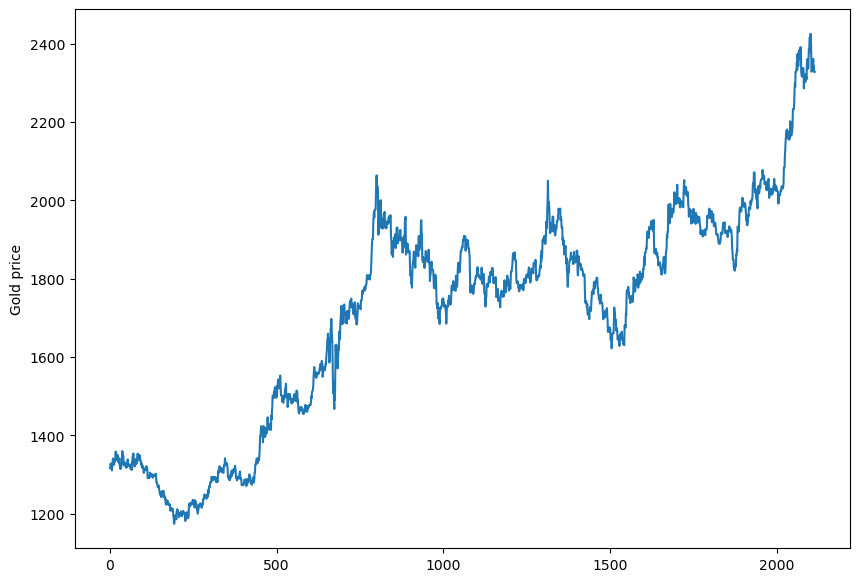

In [5]:
df.Close.plot(figsize = (10, 7))
plt.ylabel("Gold price")
plt.show()


In [6]:
t = .7
t = int(t * len(df))

data_train = df[:t]
data_test = df[t:]

In [7]:
# Chia các tập x,y train, test tương ứng
X_train = np.array(data_train.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(data_train['Close']) #Lấy dữ liệu giá Close

X_test = np.array(data_test.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(data_test['Close']) #Lấy dữ liệu giá Close

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Tạo mô hình hồi quy tuyến tính y = m*X1 + c
linear = LinearRegression().fit(X_train, y_train)
print("m1: " , linear.coef_[0])
print("c: " , linear.intercept_)

m1:  0.5167224765898817
c:  1226.1422488320527


In [10]:
predicted_price = linear.predict(X_test)
predicted = pd.DataFrame(predicted_price, columns = ['Close'])
predicted

,Close
0,1990.891514
1,1991.408237
2,1991.924959
3,1992.441682
4,1992.958404
...,...
630,2316.426674
631,2316.943397
632,2317.460119
633,2317.976842


In [11]:
mape = np.mean(np.abs(predicted_price - y_test)/np.abs(y_test)) *100
mse = np.mean(np.square(y_test - predicted_price))
rmse = np.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 10.830058610226677
Mean Squared Error (MSE): 49218.8226432187
Root Mean Squared Error (RMSE): 221.85315558544283


In [12]:
dt_train = np.append(data_train, predicted['Close'][0]) 

In [13]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = linear.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[2319.01028682 2319.5270093  2320.04373177 2320.56045425 2321.07717673
 2321.5938992  2322.11062168 2322.62734416 2323.14406663 2323.66078911
 2324.17751159 2324.69423406 2325.21095654 2325.72767902 2326.24440149
 2326.76112397 2327.27784645 2327.79456892 2328.3112914  2328.82801387
 2329.34473635 2329.86145883 2330.3781813  2330.89490378 2331.41162626
 2331.92834873 2332.44507121 2332.96179369 2333.47851616 2333.99523864
 2334.51196112 2335.02868359 2335.54540607 2336.06212855 2336.57885102
 2337.0955735  2337.61229598 2338.12901845 2338.64574093 2339.16246341
 2339.67918588 2340.19590836 2340.71263084 2341.22935331 2341.74607579
 2342.26279827 2342.77952074 2343.29624322 2343.8129657  2344.32968817
 2344.84641065 2345.36313313 2345.8798556  2346.39657808 2346.91330056
 2347.43002303 2347.94674551 2348.46346799 2348.98019046 2349.49691294
 2350.01363542 2350.53035789 2351.04708037 2351.56380284 2352.08052532
 2352.5972478  2353.11397027 2

In [14]:
plt.rcParams['figure.figsize'] = [18, 10]

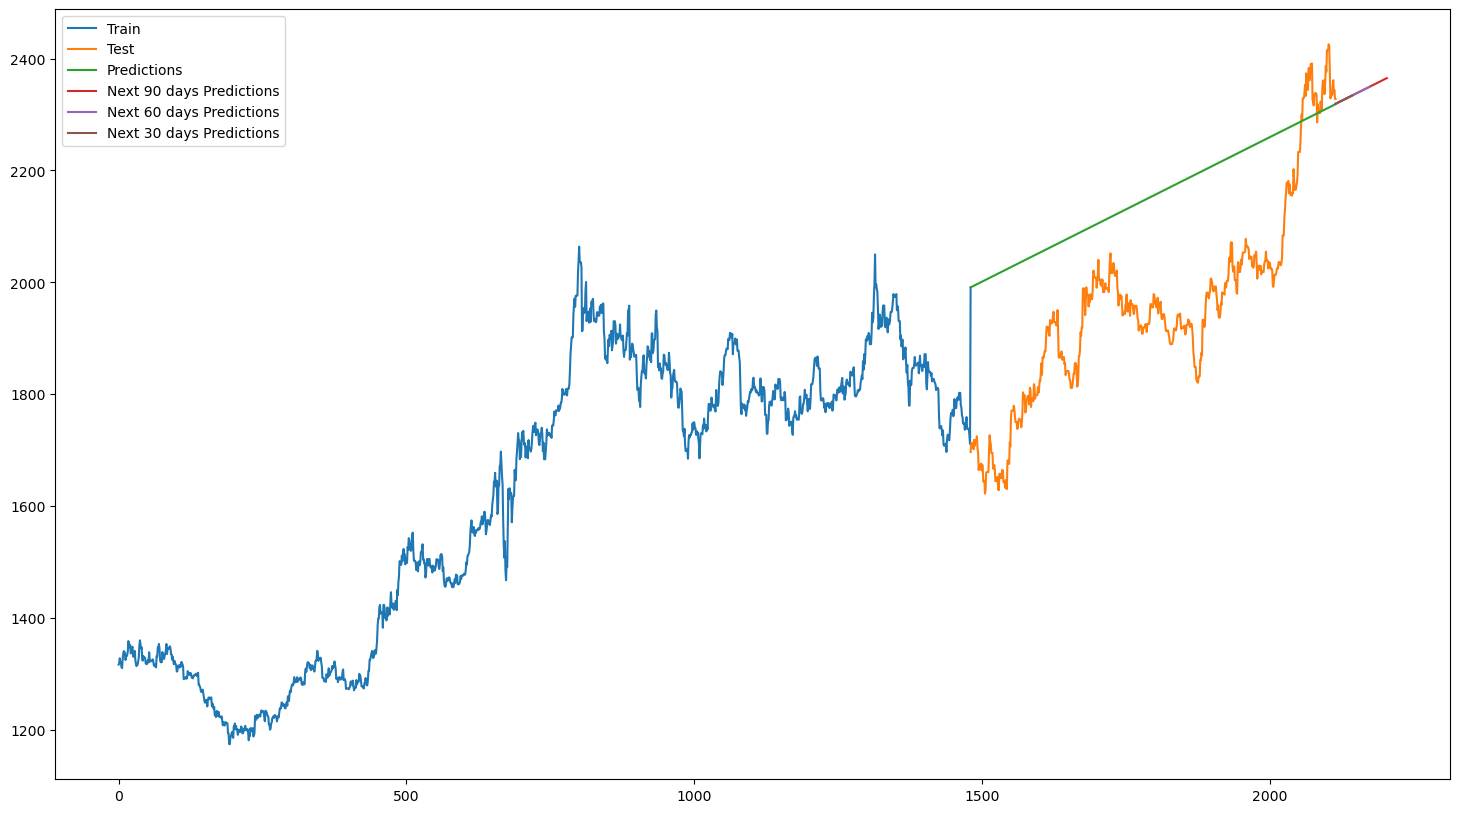

In [15]:
plt.plot(pd.RangeIndex(start=0, stop=len(dt_train), step=1), dt_train)
plt.plot(data_test.index, data_test['Close'])
plt.plot(data_test.index, predicted['Close'])
plt.plot(last_data,y_next_90_days)
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+60, step=1),y_next_90_days[0:60])
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+30, step=1),y_next_90_days[0:30])
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])

plt.show()